Užkrautas snapshotas: 3941 sekų
Naudojamas fiksuotas padalijimas iš splits_indices.npz
Fiksuotos formos: 
  X_train: (2758, 1024)  y_train: (2758,) 
  X_val:   (591, 1024)  y_val:   (591,) 
  X_test:  (592, 1024)  y_test:  (592,)
Klasės (train) balansas: Counter({np.int64(1): 1443, np.int64(0): 1315})
Class weights: {0: 1.0486692015209125, 1: 0.9556479556479557}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 1024, 64)       │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1024, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 512, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 192)            │       172,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 273,409 (1.04 MB)

 Trainable params: 273,153 (1.04 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.5648 - auc: 0.5946 - loss: 0.6772 - val_accuracy: 0.7411 - val_auc: 0.8240 - val_loss: 0.6698 - learning_rate: 0.0010
Epoch 2/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.7902 - auc: 0.8529 - loss: 0.4713 - val_accuracy: 0.6971 - val_auc: 0.8886 - val_loss: 0.5532 - learning_rate: 0.0010
Epoch 3/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.8571 - auc: 0.9126 - loss: 0.3596 - val_accuracy: 0.6701 - val_auc: 0.8548 - val_loss: 0.6716 - learning_rate: 0.0010
Epoch 4/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.7940 - auc: 0.8581 - loss: 0.4629 - val_accuracy: 0.7445 - val_auc: 0.8772 - val_loss: 0.4859 - learning_rate: 0.0010
Epoch 5/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.8546 - auc: 0.9202 - loss: 0.3456 - val_accuracy: 0.8190 - val_auc: 0.9114 - val_loss: 0.5569 - learning_rate: 0.0010
Epoch 6/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8955 - auc: 0.9461 - l

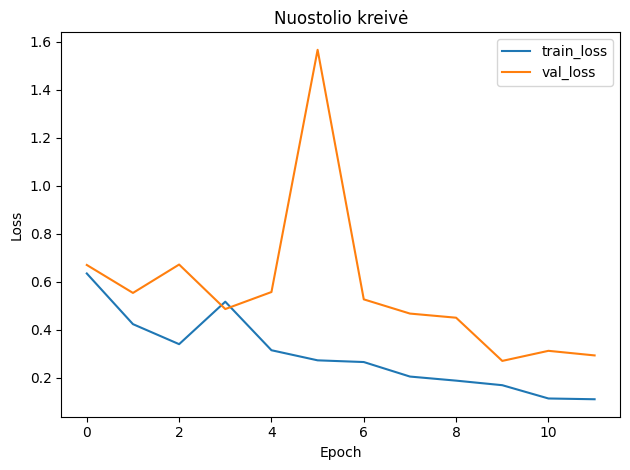

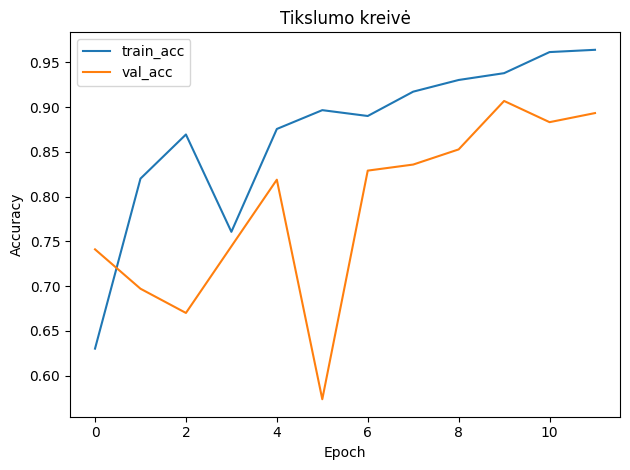

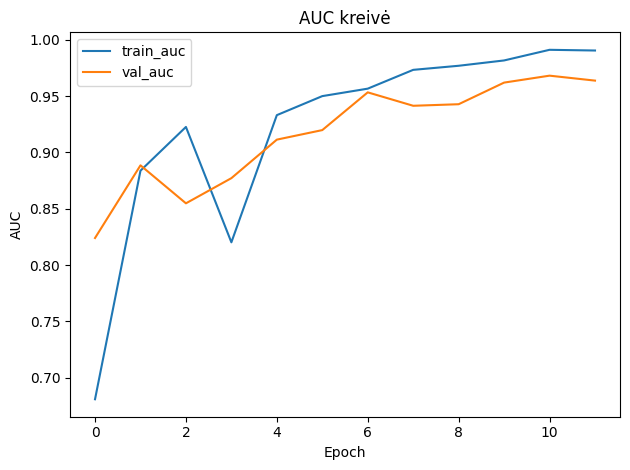

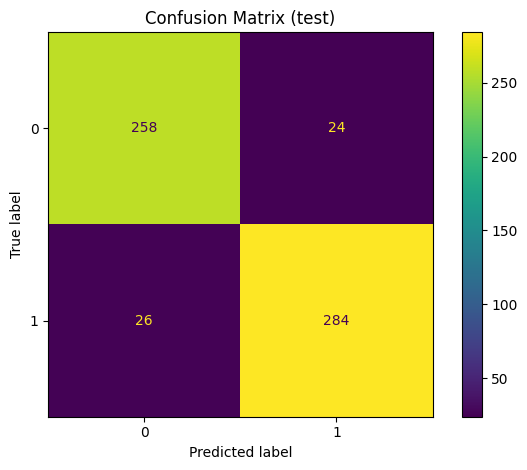


Pavyzdinė prognozė: {'prob_enzyme': 0.008368424139916897, 'pred_class': 0, 'threshold': 0.11172442883253098}
Išsaugota -> enzyme_ncbi_model.keras
Grafikai išsaugoti -> ./images/ 


In [1]:
# ============================================================
#  GILIEJI NEURONINIAI TINKLAI: ENZYME vs NON-ENZYME (FIKSUOTAS CSV)
# ============================================================

# 0) PRIKLAUSOMYBĖS ------------------------------------------
# Įdiegiame reikalingas bibliotekas: scikit-learn (duomenų apdorojimui),
# tensorflow (modeliui kurti ir mokyti).
!pip -q install scikit-learn tensorflow


# 1) IMPORTAI IR KONFIGŪRACIJA -------------------------------
import os, re, random, numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, roc_auc_score, confusion_matrix,
    precision_recall_curve, ConfusionMatrixDisplay
)
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

# Atsitiktinių skaičių generatorių 'sėklos' nustatymas (kad rezultatai būtų atkartojami).
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)


# 2) HIPERPARAMETRAI ------------------------------------------
MAX_LEN   = 1024   # Maksimalus aminorūgščių sekos ilgis (padding / truncation).
EMB_DIM   = 64     # Įterpties (embedding) dimensija.
BATCH     = 64     # Mini-partijos dydis (batch size).
EPOCHS    = 12     # Mokymo epochų skaičius.
LR        = 1e-3   # Pradinis mokymosi greitis.
ARCH      = "CNN_BiLSTM"   # Naudojama architektūra (galima pakeisti į DNN).

# Failų pavadinimai
SNAP_CSV   = "ncbi_enzyme_dataset.csv"   # Duomenų CSV failas su stulpeliais: sequence,label
SPLITS_NPZ = "splits_indices.npz"        # Failas, kuriame saugomi fiksuoti train/val/test indeksai.


# 3) SEKŲ KODAVIMAS -------------------------------------------
# Apibrėžiame 20 standartinių aminorūgščių + papildomą 'X' nežinomiems simboliams.
AA = list("ACDEFGHIKLMNPQRSTVWY")
AA2IDX = {a: i+1 for i,a in enumerate(AA)}  # kiekvienai AA suteikiamas skaitinis ID (1..20)
AA2IDX["X"] = len(AA2IDX) + 1               # nežinomi simboliai -> X
VOCAB_SIZE  = len(AA2IDX) + 1               # papildomai pridėtas 0 kaip PAD (užpildymui)

def clean_aa(seq: str) -> str:
    """Išvalo baltymo seką:
    - pašalina ne raidžių simbolius
    - konvertuoja į didžiąsias raides
    - nestandartines aminorūgštis pakeičia artimiausiomis (pvz. U->C, O->K)
    - likusius nežinomus simbolius pakeičia į 'X'
    """
    s = re.sub(r'[^A-Za-z]', '', str(seq)).upper()
    s = s.replace("U","C").replace("O","K").replace("B","D").replace("Z","E").replace("J","I")
    return "".join(ch if ch in AA2IDX else "X" for ch in s)

def encode_seq(seq: str, max_len: int = MAX_LEN) -> np.ndarray:
    """Paverčia seka į sveikųjų skaičių vektorių (pagal AA2IDX žemėlapį).
    Jei seka trumpesnė už MAX_LEN – papildoma nuliais (PAD).
    Jei ilgesnė – nukerpama iki MAX_LEN.
    """
    ids = [AA2IDX.get(ch, AA2IDX["X"]) for ch in str(seq)[:max_len]]
    if len(ids) < max_len:
        ids += [0] * (max_len - len(ids))
    return np.array(ids, dtype=np.int32)


# 4) DUOMENŲ UŽKROVIMAS IR PADALINIMAS -------------------------
# Užkraunamas CSV failas su baltymų sekomis ir žymėmis (0=nefermentas, 1=fermentas).
assert os.path.exists(SNAP_CSV), f"Nerastas {SNAP_CSV}. Įkelk CSV į tą pačią direktoriją arba pakeisk kelią."
df = pd.read_csv(SNAP_CSV)
assert {"sequence","label"}.issubset(df.columns), "CSV turi turėti stulpelius 'sequence' ir 'label'."
print("Užkrautas snapshotas:", len(df), "sekų")

# Padaliname į train/val/test. Jei jau yra išsaugoti indeksai – naudojame juos, kad rezultatai būtų identiški.
if os.path.exists(SPLITS_NPZ):
    spl = np.load(SPLITS_NPZ)
    idx_train, idx_val, idx_test = spl["idx_train"], spl["idx_val"], spl["idx_test"]
    print("Naudojamas fiksuotas padalijimas iš", SPLITS_NPZ)
else:
    # Jei nėra – sugeneruojame naują padalinimą (70% train, 15% val, 15% test).
    idx = np.arange(len(df))
    idx_train, idx_tmp = train_test_split(
        idx, test_size=0.30, stratify=df["label"], random_state=SEED
    )
    idx_val, idx_test  = train_test_split(
        idx_tmp, test_size=0.50, stratify=df["label"].iloc[idx_tmp], random_state=SEED
    )
    np.savez(SPLITS_NPZ, idx_train=idx_train, idx_val=idx_val, idx_test=idx_test)
    print("Išsaugota ->", SPLITS_NPZ)

# Užkoduojame sekas į skaitmeninius vektorius.
X_all = np.vstack([encode_seq(clean_aa(s)) for s in df["sequence"]])
y_all = df["label"].astype(int).to_numpy()

# Taikome padalinimą pagal indeksus.
X_train, y_train = X_all[idx_train], y_all[idx_train]
X_val,   y_val   = X_all[idx_val],   y_all[idx_val]
X_test,  y_test  = X_all[idx_test],  y_all[idx_test]

print("Fiksuotos formos:",
      "\n  X_train:", X_train.shape, " y_train:", y_train.shape,
      "\n  X_val:  ", X_val.shape,   " y_val:  ", y_val.shape,
      "\n  X_test: ", X_test.shape,  " y_test: ", y_test.shape)

# Apskaičiuojame klasių disbalansą ir pritaikome svorius, kad modelis nebūtų šališkas.
print("Klasės (train) balansas:", Counter(y_train))
classes = np.unique(y_train)
cw = compute_class_weight(class_weight="balanced", classes=classes, y=y_train)
class_weights = {int(c): float(w) for c, w in zip(classes, cw)}
print("Class weights:", class_weights)


# 5) MODELIO ARCHITEKTŪRA -------------------------------------
def build_model(arch: str = ARCH,
                vocab_size: int = VOCAB_SIZE,
                max_len: int = MAX_LEN,
                emb_dim: int = EMB_DIM,
                lr: float = LR):
    # Įvesties sluoksnis (vienos sekos ilgis = MAX_LEN).
    inp = layers.Input(shape=(max_len,), dtype="int32")
    # Embedding sluoksnis – simboliai paverčiami į tankius vektorius.
    x   = layers.Embedding(input_dim=vocab_size, output_dim=emb_dim)(inp)

    if arch == "DNN":
        # Paprastesnė architektūra: tik Dense sluoksniai.
        x = layers.GlobalAveragePooling1D()(x)
        x = layers.Dense(256, activation="relu")(x); x = layers.Dropout(0.4)(x)
        x = layers.Dense(128, activation="relu")(x); x = layers.Dropout(0.3)(x)
    elif arch == "CNN_BiLSTM":
        # CNN sluoksnis (filtrai aptinka vietinius motyvus).
        x = layers.Conv1D(128, kernel_size=9, padding="same", activation="relu")(x)
        x = layers.BatchNormalization()(x)             # Normalizacija
        x = layers.MaxPooling1D(pool_size=2)(x)        # Sumažinamas sekos ilgis
        x = layers.Bidirectional(layers.LSTM(96, return_sequences=False))(x) # BiLSTM – mokosi seka pirmyn ir atgal
        x = layers.Dropout(0.5)(x)                     # Dropout apsaugai nuo persimokymo
        x = layers.Dense(128, activation="relu")(x); x = layers.Dropout(0.3)(x)
    else:
        raise ValueError("ARCH turi būti 'DNN' arba 'CNN_BiLSTM'")

    # Išvesties sluoksnis: sigmoid → tikimybė (0 = nefermentas, 1 = fermentas).
    out = layers.Dense(1, activation="sigmoid")(x)

    # Surenkame modelį
    model = models.Model(inp, out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss="binary_crossentropy",          # Nuostolių funkcija (klasifikacijai)
        metrics=["accuracy", tf.keras.metrics.AUC(name="auc")] # Tikslumas + AUC
    )
    return model

# Sukuriame modelį ir atspausdiname architektūrą.
model = build_model(ARCH)
model.summary()


# 6) TRENIRUOTĖ -----------------------------------------------
# Callback'ai: EarlyStopping (stabdo, jei validacijos AUC nebegerėja) ir ReduceLROnPlateau (mažina LR).
cb = [
    callbacks.EarlyStopping(monitor="val_auc", mode="max", patience=4, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, min_lr=1e-5, verbose=1)
]

# Modelio mokymas
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH,
    class_weight=class_weights,
    verbose=1,
    callbacks=cb
)


# 7) SLENKSČIO PARINKIMAS PAGAL VALIDACIJOS F1 ----------------
# Numatyta sigmoid išvestis → [0..1]. Vietoj fiksuoto 0.5, ieškome tokio slenksčio, kuris maksimizuoja F1.
val_probs = model.predict(X_val).ravel()
p, r, th = precision_recall_curve(y_val, val_probs)
f1 = 2*p*r/(p+r+1e-9)
best_tau = 0.5 if len(th)==0 else float(th[np.argmax(f1[:-1])])
print("Parinktas slenkstis (pagal val F1):", round(best_tau, 3))


# 8) ĮVERTINIMAS ANT TEST -------------------------------------
# Atliekame prognozes su test duomenimis.
probs = model.predict(X_test).ravel()
preds = (probs >= best_tau).astype(int)

# Spausdiname klasifikacijos ataskaitą (precision, recall, f1), ROC-AUC ir klaidų matricą.
print("\n=== KLASIFIKACIJOS ATASKAITA (TEST) ===")
print(classification_report(y_test, preds, digits=4))
print("ROC-AUC (test):", roc_auc_score(y_test, probs))
print("Klaidų matrica (test):\n", confusion_matrix(y_test, preds))


# 9) GRAFIKAI -------------------------------------------------
Path("images").mkdir(exist_ok=True)

# Nuostolių kreivė
plt.figure()
plt.plot(history.history.get("loss", []), label="train_loss")
plt.plot(history.history.get("val_loss", []), label="val_loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Nuostolio kreivė"); plt.legend()
plt.tight_layout(); plt.savefig("images/loss_curve.png", dpi=200); plt.show()

# Tikslumo kreivė
plt.figure()
plt.plot(history.history.get("accuracy", []), label="train_acc")
plt.plot(history.history.get("val_accuracy", []), label="val_acc")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title("Tikslumo kreivė"); plt.legend()
plt.tight_layout(); plt.savefig("images/acc_curve.png", dpi=200); plt.show()

# AUC kreivė
plt.figure()
plt.plot(history.history.get("auc", []), label="train_auc")
plt.plot(history.history.get("val_auc", []), label="val_auc")
plt.xlabel("Epoch"); plt.ylabel("AUC"); plt.title("AUC kreivė"); plt.legend()
plt.tight_layout(); plt.savefig("images/auc_curve.png", dpi=200); plt.show()

# Klaidų matrica
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
plt.title("Confusion Matrix (test)")
plt.tight_layout(); plt.savefig("images/confusion_matrix.png", dpi=200); plt.show()


# 10) PROGNOZĖ NAUJAI SEKAI -----------------------------------
def predict_protein_sequence(seq: str, threshold: float = None):
    """Funkcija, kuri priima naują baltymo seką ir grąžina:
    - tikimybę, kad tai fermentas
    - prognozuotą klasę (0/1), priklausomai nuo slenksčio
    - kokį slenkstį naudojo
    """
    if threshold is None:
        threshold = best_tau
    s = clean_aa(seq)
    x = np.array([encode_seq(s)])
    p = float(model.predict(x, verbose=0).ravel()[0])
    return {"prob_enzyme": p, "pred_class": int(p >= threshold), "threshold": threshold}

print("\nPavyzdinė prognozė:", predict_protein_sequence("MKKLIALKHKDEMKKLAAAGGGSSSSVVVVVVNNNPPPQQQ"))


# 11) MODELIO IŠSAUGOJIMAS -----------------------------------
# Išsaugome modelį ir grafikus, kad galima būtų atkartoti.
model.save("enzyme_ncbi_model.keras")
print("Išsaugota -> enzyme_ncbi_model.keras")
print("Grafikai išsaugoti -> ./images/ ")
